# Prepare synthetic survey data for the practicals

https://en.wikipedia.org/wiki/Geology_of_Cape_Town

In [26]:
import pooch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
import harmonica as hm
import boule as bl
import pyproj

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
data = hm.datasets.fetch_south_africa_gravity()
data = data[data.elevation > 0]
data

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,latitude,longitude,elevation,gravity
43,-34.12971,18.34444,32.2,979656.12
44,-34.08833,18.36028,592.5,979508.21
45,-34.19583,18.37418,18.4,979666.46
47,-34.23972,18.40388,25.0,979671.03
48,-34.16444,18.41112,228.7,979616.11
...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09
14555,-17.98333,21.27500,1033.3,978183.09
14556,-17.99166,21.70833,1041.8,978182.69
14557,-17.95833,21.85000,1033.3,978193.18


/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


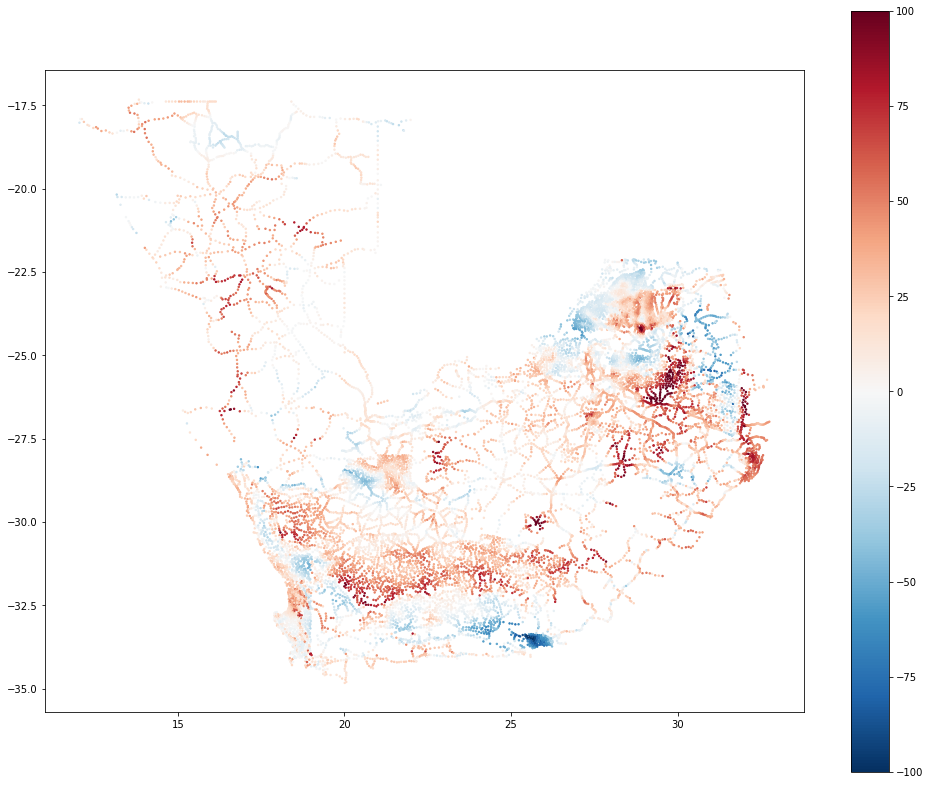

In [3]:
plt.figure(figsize=(17, 14))
plt.scatter(data.longitude, data.latitude, c=data.gravity - bl.WGS84.normal_gravity(data.latitude, data.elevation), s=2, vmin=-100, vmax=100, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

In [33]:
region = [18, 19, -35, -33.6]
projection = pyproj.Proj("+proj=utm +zone=34H +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
survey = data.loc[vd.inside((data.longitude, data.latitude), region) & (data.elevation < 300)].copy().reset_index(drop=True)
survey["station"] = np.arange(survey.shape[0])
survey["easting"], survey["northing"] = projection(survey.longitude.values, survey.latitude.values)
survey

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,latitude,longitude,elevation,gravity,bouguer,station,easting,northing
0,-34.12971,18.34444,32.2,979656.12,2.336569,0,255105.430893,6.220276e+06
1,-34.19583,18.37418,18.4,979666.46,4.409810,1,258037.644761,6.213013e+06
2,-34.23972,18.40388,25.0,979671.03,6.589470,2,260899.254592,6.208215e+06
3,-34.16444,18.41112,228.7,979616.11,-1.942558,3,261353.986978,6.216582e+06
4,-34.29778,18.42557,104.0,979662.74,8.954696,4,263060.437620,6.201825e+06
...,...,...,...,...,...,...,...,...
94,-33.75389,18.88222,193.8,979565.46,-25.079210,94,303848.172061,6.263117e+06
95,-33.92944,18.89111,199.2,979581.57,-22.581945,95,305070.978580,6.243665e+06
96,-33.79388,18.95612,144.1,979577.13,-26.523421,96,310782.022418,6.258820e+06
97,-33.63000,18.96278,179.2,979561.52,-21.556847,97,311039.881053,6.277007e+06


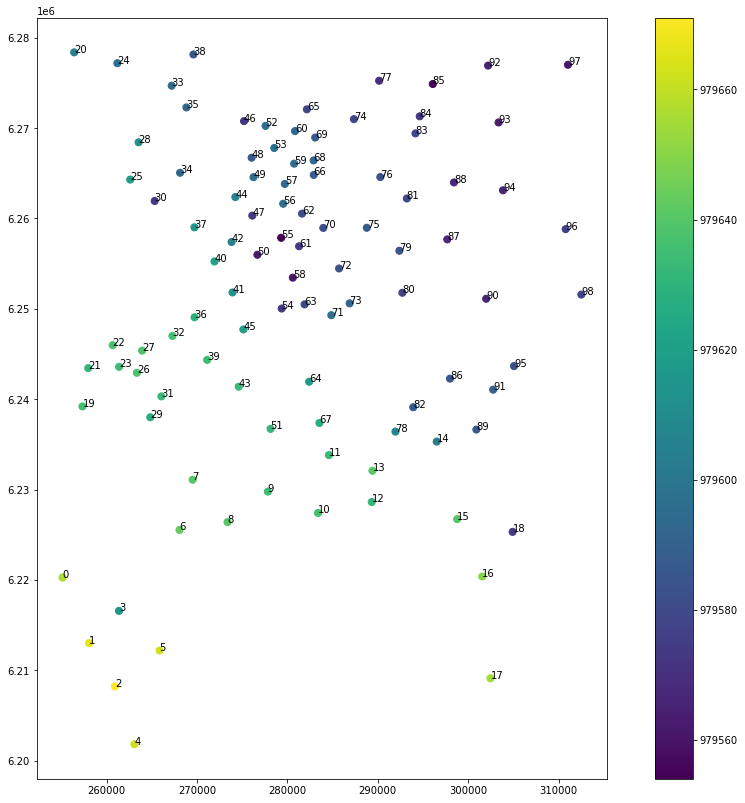

In [39]:
plt.figure(figsize=(17, 14))
ax = plt.subplot(111)
tmp = ax.scatter(survey.easting, survey.northing, c=survey.gravity, s=50)
for i in range(survey.shape[0]):
    ax.text(survey.easting[i], survey.northing[i], str(survey.station[i]))
plt.axis("scaled")
plt.colorbar(tmp)

In [35]:
base = 0
base_gravity = survey.gravity[base]
survey_stations = [np.concatenate([[base], section, [base]]) for section in np.array_split(survey.station[1:], 3)]
survey_stations

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         0]),
 array([ 0, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
         0]),
 array([ 0, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
        83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  0])]

In [36]:
surveys = [survey.iloc[stations].copy().reset_index(drop=True) for stations in survey_stations]
surveys

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[    latitude  longitude  elevation    gravity    bouguer  station  \
 0  -34.12971   18.34444      32.20  979656.12   2.336569        0   
 1  -34.19583   18.37418      18.40  979666.46   4.409810        1   
 2  -34.23972   18.40388      25.00  979671.03   6.589470        2   
 3  -34.16444   18.41112     228.70  979616.11  -1.942558        3   
 4  -34.29778   18.42557     104.00  979662.74   8.954696        4   
 5  -34.20500   18.45860       8.90  979662.48  -2.209219        5   
 6  -34.08528   18.48611      19.00  979642.88  -9.771637        6   
 7  -34.03555   18.50333      15.10  979640.22  -9.028679        7   
 8  -34.07861   18.54388      34.70  979640.33  -8.674113        8   
 9  -34.04916   18.59306      59.60  979633.95  -7.686953        9   
 10 -34.07167   18.65250      64.80  979636.03  -6.471747       10   
 11 -34.01418   18.66722      43.90  979633.34  -8.452923       11   
 12 -34.06194   18.71722      75.50  979631.50  -8.081244       12   
 13 -34.03082   18.7

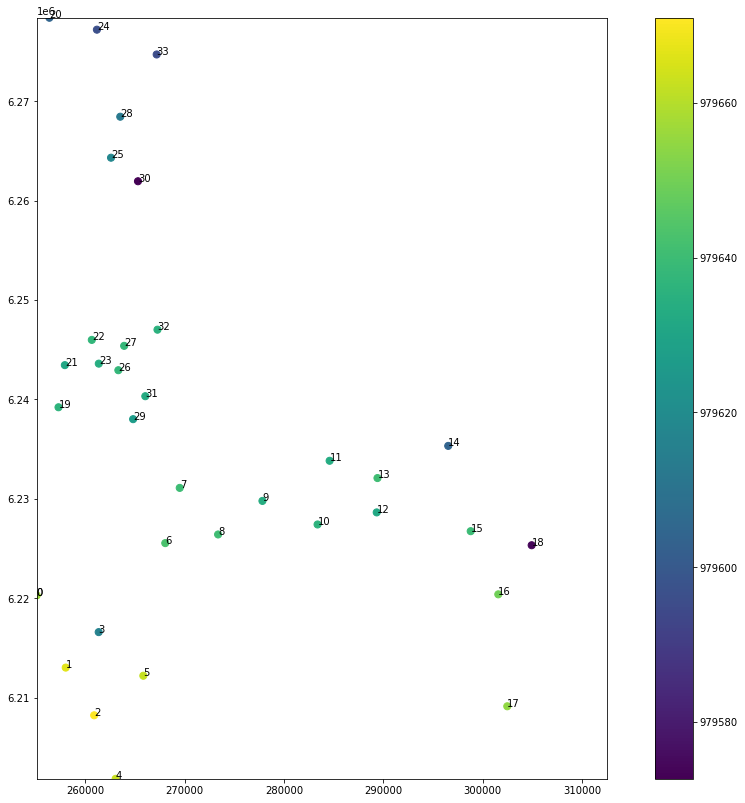

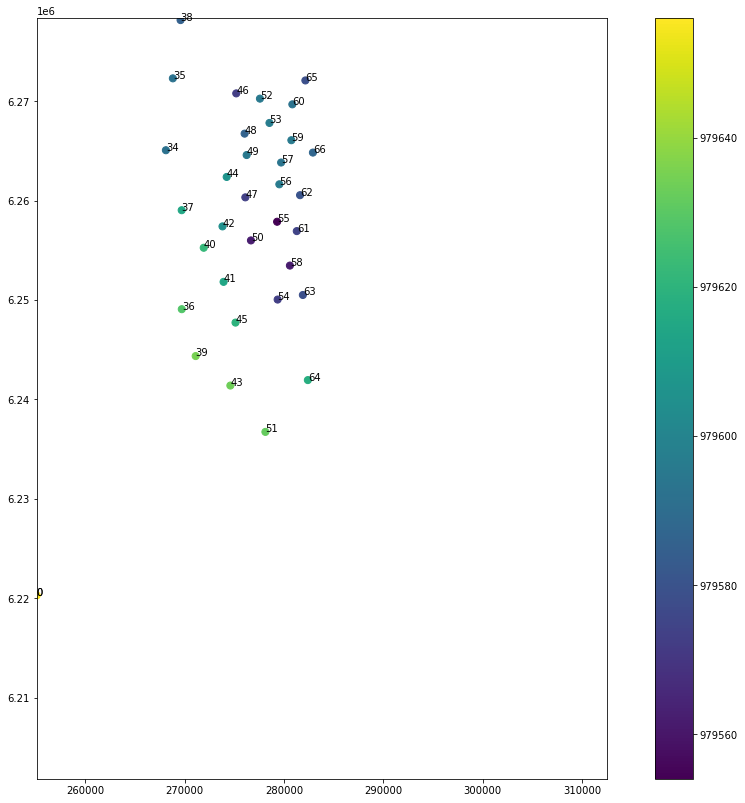

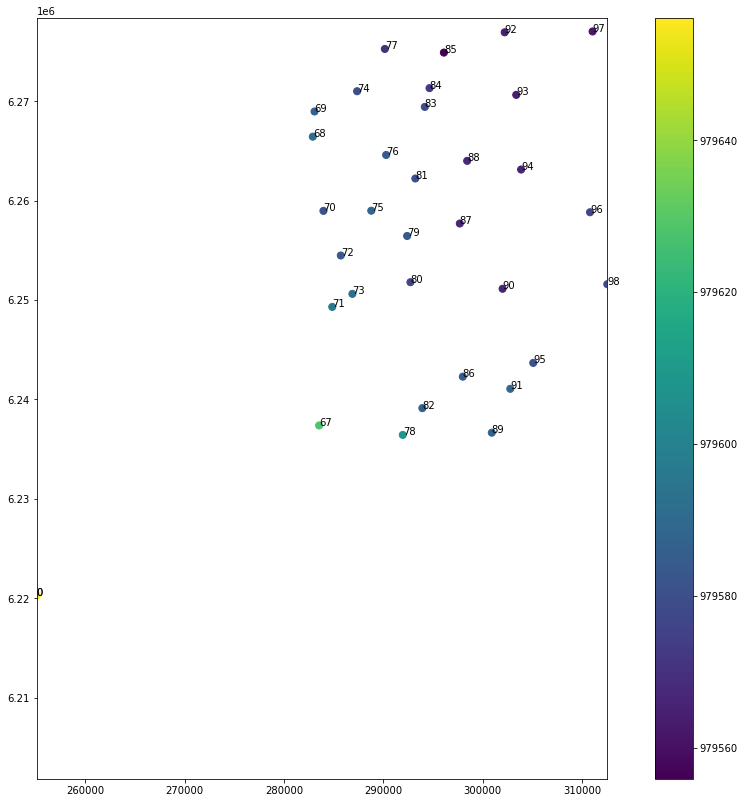

In [47]:
for j in range(3):
    plt.figure(figsize=(17, 14))
    plt.scatter(surveys[j].easting, surveys[j].northing, c=surveys[j].gravity, s=50)
    for i in range(surveys[j].shape[0]):
        plt.text(surveys[j].easting.iloc[i], surveys[j].northing.iloc[i], str(surveys[j].station.iloc[i]))
    plt.axis("scaled")
    plt.xlim(survey.easting.min(), survey.easting.max())
    plt.ylim(survey.northing.min(), survey.northing.max())
    plt.colorbar()